1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

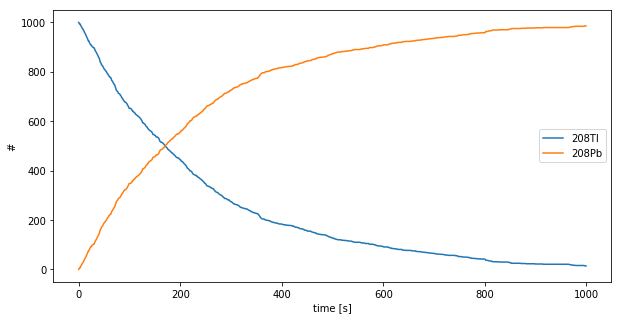

Text(0, 0.5, '#')

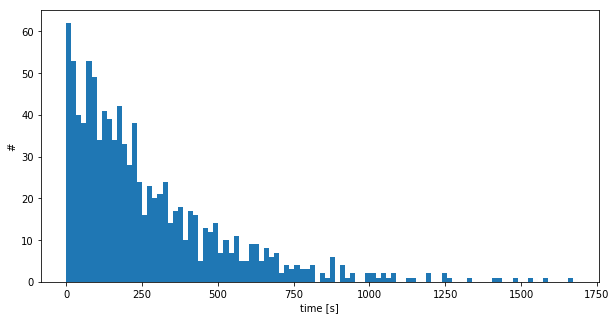

In [2]:
import numpy as np
import matplotlib.pyplot as plt

tau = 3.052 * 60
n_Tl = 1000
n_Pb = 0
p = 1 - 2**(-1 / tau)

v_Tl = np.array([n_Tl])
v_Pb = np.array([n_Pb])

total_time = 1000
time_range = np.arange(0, total_time, 1)

for t in time_range[1:]:
    for x in range(n_Tl):
        j = np.random.rand()
        if j < p:
            n_Tl -= 1
            n_Pb += 1
    v_Tl = np.append(v_Tl, n_Tl)
    v_Pb = np.append(v_Pb, n_Pb)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time_range, v_Tl, label='208Tl')
ax.plot(time_range, v_Pb, label="208Pb")
ax.set_xlabel("time [s]")
ax.set_ylabel("#")
ax.legend()
plt.show()


# PART 2 WITH THE INVERSE METHOD
def expon_icdf(z, mu=np.log(2) / tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1 - z) / mu


rand = np.random.rand(1000)
v = expon_icdf(rand)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(v, bins=100)
ax.set_xlabel("time [s]")
ax.set_ylabel("#")


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [5]:
import numpy as np
import pandas as pd

E = 7.7e6  # eV
a0 = 5.2917777210922e-11
sigma = a0 / 100
N_alpha = 10**6  # Number of alpha particles shot
Z = 79  # gold atomic number
e = 1.602e-19  # C
epsilon_0 = 8.85e-12  # F/m

def gauss_2d(mu, sigma):
    x = np.random.normal(mu, sigma)
    y = np.random.normal(mu, sigma)
    return (x, y)

z = np.random.uniform(0, 1, N_alpha)
r = np.array([gauss_2d(0,sigma) for i in range(N_alpha)])
b = np.array([np.linalg.norm(x) for x in r])

theta = np.abs(2 * np.arctan(Z * e / (2 * np.pi * epsilon_0 * E * b)))
frac = len(theta[theta > (np.pi / 2)]) / len(theta)
print("The fraction fo particles scattered backwards is: ", frac * 100, "%")

The fraction fo particles scattered backwards is:  0.1523 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [20]:
import numpy as np
import scipy.integrate as integrate

def f(k):
    """function"""
    return np.sin(1 / (k * (2 - k)))**2


# good integration technique
N = 100000
x = np.linspace(0.001, 1.999, N)
I_real = integrate.trapz(f(x), x)
print(I_real)

# Monte Carlo integration
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x):
        count += 1
Int = 2 * count / N

print(Int)
print("error: ", Int - I_real)
# Mean method
f_values = [f(2 * np.random.random()) for n in range(N)]
mean_f = np.mean(f_values)
int_mean = 2 * mean_f
err_mean = 2 * np.std(f_values) / np.sqrt(N)
print(int_mean, " +- ", err_mean)


1.4505331367878012
1.45102
error:  0.0004868632121988181
1.4525791070337113  +-  0.0016644989981702521


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [9]:
import numpy as np


def f(j, k):
    """2d circle"""
    if j * j + k * k < 1:
        return 1
    return 0


# 2dim case
N = 1000000
x = -1 + 2 * np.random.random(N)
y = -1 + 2 * np.random.random(N)

print(x)
print(y)
f_values = [f(xi, yi) for (xi, yi) in zip(x, y)]
int = np.mean(f_values) * 4
print(int)

# Ndim
dim = 2


def f(r):
    """2d circle"""
    if np.linalg.norm(r) < 1:
        return 1
    return 0


r = []
for i in range(N):
    r_tmp = []
    for k in range(dim):
        r_tmp.append(np.random.random())
    r.append(r_tmp)

f_values = [f(ri) for ri in r]
int = np.mean(f_values) * 2**dim
print(int)

[ 0.98829978  0.71082726  0.10013624 ... -0.01514263 -0.6181328
  0.15885044]
[ 0.10227549 -0.77122167 -0.06305603 ...  0.45234831  0.63259486
 -0.05035389]
3.141084
3.142608


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [14]:

import numpy as np


def f(o):
    return o**(-0.5) / (np.exp(o) + 1)


def w(u):
    return u**(-0.5)


N = 1000000
x = np.random.rand(N)
f_values = f(x)
w_values = w(x)
f_over_w = f_values / w_values
int = np.mean(f_over_w) * 2  # 2 stands for 2(√1-√0)
print(int)

0.7597732990467004
